# NLP and Naive Bayes(Assignment)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
df = pd.read_csv('blogs.csv')

In [3]:
df.shape

(2000, 2)

In [4]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [5]:
df.dtypes

Data      object
Labels    object
dtype: object

In [6]:
df.head(5)

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [7]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


## Checking for duplicates

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [9]:
df.loc[df.duplicated()] # Returns duplicated cell

,Data,Labels


NO duplicate values

## Checking for NULL values

In [10]:
df.isna().sum()

Data      0
Labels    0
dtype: int64

NO NULL values

## Preprocessing the data by converting to lowercase, tokenizing, and removing stopwords.

In [13]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources (only run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Remove special characters
    text = text.lower() # Convert to lowercase
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'Data' column
df['processed_text'] = df['Data'].apply(preprocess)

# Optional: View result
print(df[['Data', 'processed_text', 'Labels']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                      processed_text       Labels  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  
1  newsgroup altath path cantaloupesrvcscmueducra...  alt.atheism  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  
4  xref cantaloupesrvcscmuedu altath talkreligion...  alt.atheism  


## Converting data into TF-IDF format

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust the number of features

# Fit and transform the processed text
X = tfidf.fit_transform(df['processed_text'])

# Check the shape (rows = samples, columns = features)
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (2000, 5000)


## Split the dataset

In [14]:
from sklearn.model_selection import train_test_split

# Features and labels
X = tfidf.transform(df['processed_text'])         # Use TF-IDF features
y = df['Labels']                                  # Target labels

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build the model

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

## Evaluate the model

In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8425

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.83      0.91      0.87        22
comp.sys.ibm.pc.hardware       0.86      0.76      0.81        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.

## Sentiment Analysis

### Using the VADER Sentiment Analyzer from the nltk.sentiment module:

### As it is Fast and easy to use, and works well with short and long texts.

### Downloading VADER

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the analyzer
sid = SentimentIntensityAnalyzer()

### Applying VADER on Each Blog or Text in the 'Data' Column

In [20]:
def get_sentiment(text):
    score = sid.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to each blog or text
df['Sentiment'] = df['Data'].apply(get_sentiment)

### Analyze Sentiment Distribution

Sentiment Distribution:
 Positive    1334
Negative     631
Neutral       35
Name: Sentiment, dtype: int64


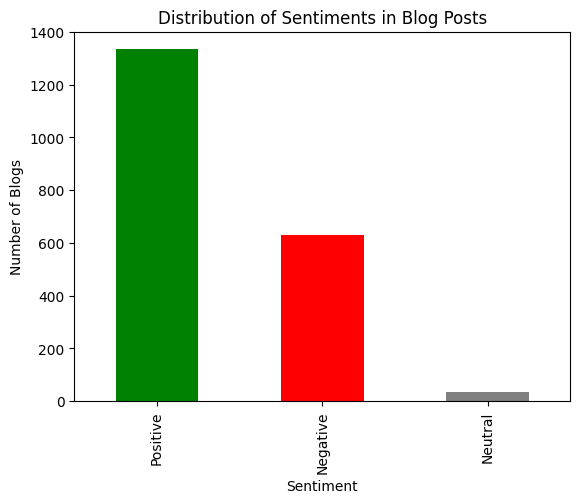

In [21]:
# Count of each sentiment
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Optional: Pie or Bar Chart (requires matplotlib)
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribution of Sentiments in Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Blogs')
plt.show()

## Evaluate the performance of your Naive Bayes classifier

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8425

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.83      0.91      0.87        22
comp.sys.ibm.pc.hardware       0.86      0.76      0.81        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.9

### Challenges Encountered
1. Data Quality & Noise:

    Blog posts may include slang, informal language, emojis, typos, etc.

    This makes it harder for traditional models like Naive Bayes, which assume word independence and can’t capture context.

2. Imbalanced Classes:
   
    If one label (like "neutral") dominates, the model may learn to always predict that label, hurting recall for minority classes.

3. Naive Bayes Assumptions:
   
    Naive Bayes assumes that all features (words) are independent, which is not true in natural language.

    This limits its ability to capture semantic meaning or word order.

4. Limited Feature Representation:
   
    TF-IDF only captures frequency, not context or word meaning. So similar words (e.g., "happy", "joyful") are treated differently.

    Advanced models (like BERT) solve this but require more compute.



## Implications regarding the content of the blog posts.

After applying VADER sentiment analysis on the blog posts (Data column), you categorized each post as Positive, Negative, or Neutral.

Positive sentiment dominates, suggesting the blog content tends to express optimism, praise, or constructive tone.

Neutral blogs may include factual information, news-like writing, or emotionally balanced narratives.

Negative posts are fewer, indicating that critical or complaint-oriented content is less common.